In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d drscarlat/melanoma

Dataset URL: https://www.kaggle.com/datasets/drscarlat/melanoma
License(s): unknown
melanoma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# prompt: code for unziping file
import zipfile
zip_ref=zipfile.ZipFile('/content/melanoma.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/DermMel/train_sep',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/DermMel/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 10682 files belonging to 2 classes.
Found 3561 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:

model = Sequential()

model.add(Conv2D(8, kernel_size=(2,2), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(16, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[early_stopping])

Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 72s 202ms/step - accuracy: 0.6540 - loss: 0.6274 - val_accuracy: 0.8335 - val_loss: 0.3680
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 68s 170ms/step - accuracy: 0.8316 - loss: 0.3889 - val_accuracy: 0.8500 - val_loss: 0.3625
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 73s 142ms/step - accuracy: 0.8601 - loss: 0.3248 - val_accuracy: 0.8307 - val_loss: 0.4011
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 92s 172ms/step - accuracy: 0.8927 - loss: 0.2640 - val_accuracy: 0.9160 - val_loss: 0.2211
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 82s 172ms/step - accuracy: 0.8894 - loss: 0.2693 - val_accuracy: 0.8865 - val_loss: 0.2783
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 71s 139ms/step - accuracy: 0.9084 - loss: 0.2292 - val_accuracy: 0.9110 - val_loss: 0.2349
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.9035 - loss: 0.2310 - val_accuracy: 0.9129 - val_loss: 0.2185
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 92s 172ms/step - accuracy: 0.9239 - loss: 0

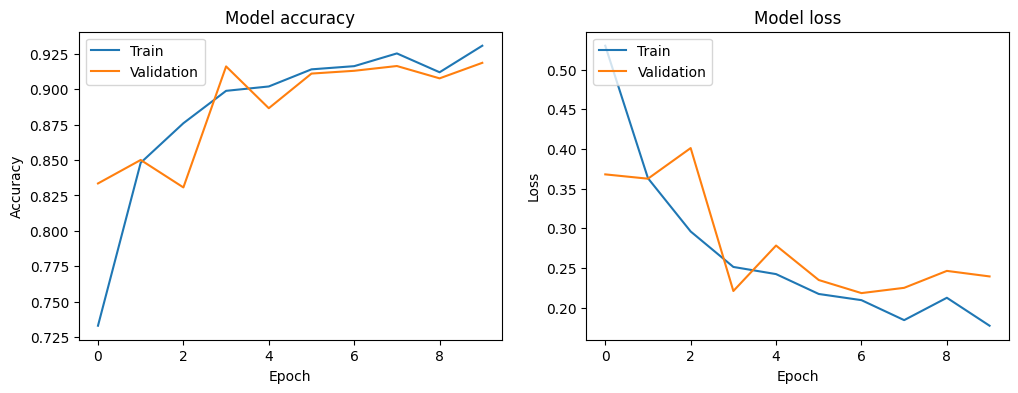

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 255, 255, 8)         │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 16)        │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,563,277 (21.22 MB)

 Trainable params: 1,854,425 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,708,852 (14.15 MB)

In [ ]:
# Save the model to the D directory on your local machine
model.save('D:/your_model_name.h5')

In [ ]:
# Save the model in Google Colab environment
model.save('/content/Melanoma.h5')

# Download the model to your local machine
from google.colab import files
files.download('/content/Melanoma.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#This code is for direclty showing the exact value of prediction for melanoma and non_melanoma
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load, normalize, and predict the image
def load_and_predict_image(img_path, model):
    # Load the image with target size (256, 256) matching the input size of your model
    img = image.load_img(img_path, target_size=(256, 256))

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Normalize the image between 0 and 1
    img_array = img_array / 255.0

    # Expand the dimensions to match the model input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the result (model will output a probability)
    prediction = model.predict(img_array)

    # Since sigmoid is used, the output will be between 0 and 1
    # We can apply a threshold of 0.5 to decide the class
    if prediction >= 0.5:
        print(f"Predicted class: Melanoma with confidence {prediction[0][0]:.2f}")
    else:
        print(f"Predicted class: Non-melanoma with confidence {1 - prediction[0][0]:.2f}")

# Example usage:
img_path = '/content/DermMel/valid/Malignant/AUG_0_6731.jpeg'  # Replace with the path to your image
load_and_predict_image(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Melanoma with confidence 0.74


Explanation:
Loading the Image: **bold text**

The image.load_img() function loads the image from the given path, and it resizes it to 256x256 (the size you specified during training).
Convert to Array:

The image.img_to_array() function converts the loaded image into a NumPy array, which is the format required by the model.
**Normalization:**

We divide the pixel values by 255.0 to ensure that the pixel values are between 0 and 1, as the model expects normalized inputs.
**Expanding Dimensions:**

We use np.expand_dims() to add an extra dimension, so the input matches the shape expected by the model (batch size, height, width, channels).
**Prediction:**

The model outputs a probability between 0 and 1 because of the sigmoid activation function in the output layer.
If the prediction is greater than or equal to 0.5, it is considered a melanoma (class 1), otherwise, it is classified as non-melanoma (class 0).
**Example of Prediction Output:**
If the model predicts 0.8, the output will be:
**"Predicted class:** Melanoma with confidence 0.80"
If the model predicts 0.3, the output will be:
"**Predicted class:** Non-melanoma with confidence 0.70"
**Important Notes:**
Make sure the input image size matches the size the model expects (256x256 in your case).
The threshold is set to 0.5 to distinguish between melanoma and non-melanoma, but you can adjust this depending on your use case.

In [ ]:

#For directly result like 1 for melanoma and 0 for non melanoma

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load, normalize, and predict the image
def load_and_predict_image(img_path, model):
    # Load the image with target size (256, 256) matching the input size of your model
    img = image.load_img(img_path, target_size=(256, 256))

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Normalize the image between 0 and 1
    img_array = img_array / 255.0

    # Expand the dimensions to match the model input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the result (model will output a probability)
    prediction = model.predict(img_array)

    # Apply a threshold to get binary output: 1 for melanoma, 0 for non-melanoma
    predicted_class = 1 if prediction >= 0.5 else 0

    # Output the result
    if predicted_class == 1:
        print("Predicted class: Melanoma (1)")
    else:
        print("Predicted class: Non-melanoma (0)")

# Example usage:
img_path = '/content/DermMel/valid/Benign/ISIC_0029637.jpg'  # Replace with the path to your image
load_and_predict_image(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Non-melanoma (0)


Prediction Threshold:

The model outputs a probability between 0 and 1 because you are using the sigmoid activation function. A value ≥ 0.5 is considered melanoma (1), and a value < 0.5 is considered non-melanoma (0).
Binary Class Output:

predicted_class = 1 if prediction >= 0.5 else 0 assigns 1 for melanoma and 0 for non-melanoma based on the threshold.
Example Output:
If the model predicts a value of 0.8, the output will be:
"Predicted class: Melanoma (1)"
If the model predicts a value of 0.3, the output will be:
"Predicted class: Non-melanoma (0)"